# Exam 01

You will be provided with information about where you will find the datasets needed for the exercises. 

**I affirm that I have upheld the highest principles of honesty and integrity in my academic work and have not witnessed a violation of the Honor Code.**

Sign here: Quan Nguyen

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC                        
from sklearn import naive_bayes     
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn import tree
import matplotlib.cm as cm
plt.style.use('seaborn-bright')

# Short answer problems

## Problem 1

**Short Answer Questions**.  Provide a short justification for your answer.

a. **T/F**: The goal of PCA is to interpret the undelying structure of data in terms of the principal components that are best at predicting the output variable.

b. **T/F**: Principle components are always orthogonal to each other.

c. Which of the following are expected to help improve the accuracy of a classifier? 
* increase/decrease training data size
* increase/decrease model complexity   


#### your answers here

**a.** False. The main goal of a PCA analysis is to identify patterns in data. It identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

**b.** True. PCA finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on—as many axes as the number of dimensions in the dataset.


**c.**
- increase
- increase, but at some point, increasing complexity reduces the accuracy due to overfitting


## Problem 2a

<img src="http://public.gettysburg.edu/~jpuckett/ds325/exam01/exam01-figure-knnSVM.png">

Consider the following training data shown above. We will use kNN to model the training data.

The test data in question is at $Q=(-0.2,1)$.

**i.** What is the prediction of the 1-nearest-neighbor classifier at point Q? 


**ii.** What is the prediction of the 3-nearest-neighbor classifier at point Q? 


**iii.** What is the prediction of the 5-nearest-neighbor classifier at point Q? 


**iv.** What is the prediction of the 15-nearest-neighbor classifier at point Q? 

**v.** Why might using too large values k be bad in this dataset? Why might too small values of k also be bad?
 

#### your answers here

**i**: orange (same class as sample at $(0,1)$)

**ii**: orange (3 samples on verticle line at $x_1=0$)

**iii**: blue (3 blues and 2 oranges)

**iv**: error because this must true: n_neighbors $\leq$ n_samples, but ($15\nleq 9$)

**v**:
- Because if k is too large, then the sample will be classified based on the number samples of each class (underfitting)
- If k is too small, the model will be overfitting

## Problem 2b

<img src="http://public.gettysburg.edu/~jpuckett/ds325/exam01/exam01-figure-knnSVM.png">

Consider the following training data shown above. We will now use an SVM to model the training data. 

**i.** What is the size of the margin?

**ii.** Why is a large margin desirable?

**iii.** If the data is modeled using a linear SVM, what may happen to the decision boundary if one of the samples is removed?

**iv.** Would you rather use a SVM or kNN to model this dataset?


#### your answers here

**i**: about 1.0

**ii**: because large margin means that the decision boundary should be as far away from the data of both classes as possible which helps the model easier to classify 

**iii**: It depends on which sample is removed (based on the image):
- if sample is one of the blues, then the boundary line may stay the same since there are 4 blues creating a horizontal line at $x_2=2.0$
- if sample is orange next to Q, then boundary may move down

**iv**: SVM
- Because SVM create a support vector that can easily classify those 2 classes
- KNN, however, for samples that are too far away from cluster of its class, it results in a wrong prediction. E.g. to predict orange at (0.5, -3), its nearest neighbor is a blue, so it will be a blue instead of orange


## Problem 3

After your plane crashed, you're left stranded on a deserted island.  There are lots of beautiful plants with berries growing on the island.  Some of the berries are poisonous (determined by passenger's trial and error).  You have the following data to consider.


* isSmooth - skin is smooth or rough
* is Smelly - strong pungent smell?
* isRed - red or orange in color
* isAggregated - tightly-packed clusters of fruits (think blackberry or raspberry not cherry or blueberry)



| Idx| Plant | isSmooth | isSmelly | isRed | isAggregated | isPoisonous|
| - | - | :-:| :-: | :-: | :-: | :-: |  
| 1 | A | 0 | 0 | 0 | 0 | 1 |
| 2 | B | 0 | 0 | 1 | 0 | 1 |
| 3 | C | 1 | 1 | 0 | 0 | 1 |
| 4 | D | 1 | 0 | 0 | 0 | 0 |
| 5 | E | 0 | 1 | 1 | 1 | 0 |
| 6 | F | 0 | 0 | 1 | 1 | 0 |
| 7 | G | 0 | 0 | 0 | 1 | 0 |
| 8 | H | 1 | 1 | 0 | 1 | 0 |


    a. Which feature should you choose as the root of a decision tree? Show all of your work by hand. If you choose to work this out on a hand written on a sheet of paper, scan and attach to this notebook.
   

# My answer
| feature | True/poison=True | True/poison=False |
| - | - | - |
| smooth | 1 | 2 |
| smell | 1 | 2 |
| red | 1 | 2 |
| aggregated | 0 | 4 |

| feature | False/poison=True | False/poison=False |
| - | - | - |
| smooth | 2 | 3 |
| smell | 2 | 3 |
| red | 2 | 3 |
| aggregated | 3 | 1 |

### Calculate the entropy
smooth, smell, red $= \frac{3}{8} (-\frac{1}{3} log_2 \frac{1}{3}) + \frac{3}{8} (-\frac{2}{3} log_2 \frac{2}{3}) + \frac{5}{8} (-\frac{2}{5} log_2 \frac{2}{5}) + \frac{5}{8} (-\frac{3}{5} log_2 \frac{3}{5}) = 0.9512 $

aggregated $= \frac{4}{8} (-\frac{4}{4} \log_2 \frac{4}{4}) + 0 + \frac{4}{8} (-\frac{3}{4} \log_2 \frac{3}{4}) + \frac{4}{8} (-\frac{1}{4} \log_2 \frac{1}{4}) = 0.4056 $

So, aggregated has lowest entropy $→$ it is root.

#### your answers here.  Show your work

| Plant | isSmooth | isSmelly | isRed | isAggregated | isPoisonous|
| - | :-:| :-: | :-: | :-: | :-: |  
| X | 1 | 1 | 1 | 1 | ? |
| Y | 0 | 1 | 0 | 0 | ? |
| Z | 1 | 1 | 0 | 0 | ? |


You know whether or not berries A through H are poisonous, but uncertain about X through Z. 


### problem 3bc and d
For questions b and c, you may use your computational tools (python) if desired.
    
    b. Build **a** decision tree to classify the berries as poisonous or not. This does not need to be an optimal tree or an ID3 tree.  Just *a* tree.
    c. Use your decision tree to classify berries X, Y and Z.
    d. Food has become scarse and you can't find plants A through H. Which of X,Y or Z would you choose to eat?
    
* Again, this doesn't need to be the optimal tree.  
* You can scan your work if you prefer.

#### your answers here.  Show your work

In [39]:
my_tree = pd.DataFrame(columns=['isSmooth', 'isSmelly', 'isRed', 'isAggregated', 'isPoisonous'])
my_tree['isSmooth'] =     [0,0,1,1,0,0,0,1]
my_tree['isSmelly'] =     [0,0,1,0,1,0,0,1]
my_tree['isRed'] =        [0,1,0,0,1,1,0,0]
my_tree['isAggregated'] = [0,0,0,0,1,1,1,1]
my_tree['isPoisonous'] =  [1,1,1,0,0,0,0,0]
display(my_tree)
X_data = my_tree.drop(['isPoisonous'], axis=1)
y_data = my_tree['isPoisonous']
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data,test_size=0.3)#, random_state=0)

,isSmooth,isSmelly,isRed,isAggregated,isPoisonous
0,0,0,0,0,1
1,0,0,1,0,1
2,1,1,0,0,1
3,1,0,0,0,0
4,0,1,1,1,0
5,0,0,1,1,0
6,0,0,0,1,0
7,1,1,0,1,0


In [40]:
clf = DecisionTreeClassifier(random_state = 0, max_depth=5)
clf.fit(X_data_train, y_data_train)
predicted = clf.predict(X_data_test)
acc = accuracy_score(y_data_test, predicted)
print(acc)

0.6666666666666666


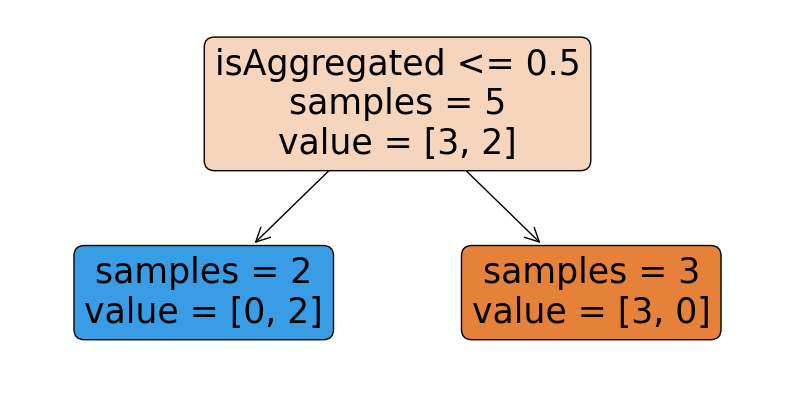

In [41]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=100)
tree.plot_tree(clf,
               feature_names = ['isSmooth', 'isSmelly', 'isRed', 'isAggregated'] 
              #  class_names=[True, False]);
               ,filled = True,rounded=True,impurity = False,proportion = False);
plt.show()

#### b) your answers here.  Show your work

Since other features have same entropy, they will be consider equally

My tree will look like this with aggregated is root:

- Aggregated?
- False $\rightarrow$ **poison**
- True: consider other features
  - Red?
  - False:
    - smell?
      - True:
        - smooth?
        - True:
        - False:
      - False:
        - smooth?
        - True:
        - False:
  - True:
    - smell?
      - True:
        - smooth?
        - True:
        - False:
      - False:
        - smooth?
        - True:
        - False:

#### c) your answers here.  Show your work
Since other features have same entropy, I check the probabilty: when they are **true** $→$ 50% is poisonous; **false** $→$ 33% is poisonous

- X: aggregated = true $→$ **not** poisonous
- Y, Z: aggregated = false $→$ consider other features
  - Since Y has smooth and red false and smell true, Y has a very small chance of being poisonous 
  - Z, having both smooth and smell true, can be poisonous

In [42]:
my_tree1 = pd.DataFrame(columns=['isSmooth', 'isSmelly', 'isRed', 'isAggregated'])
my_tree1['isSmooth'] =     [1,0,1]
my_tree1['isSmelly'] =     [1,1,1]
my_tree1['isRed'] =        [1,0,0]
my_tree1['isAggregated'] = [1,0,0]
display(my_tree1)

clf1 = DecisionTreeClassifier(random_state = 0, max_depth=5)
clf1.fit(X_data, y_data)
Y_pred = clf1.predict(my_tree1)
print(Y_pred)

,isSmooth,isSmelly,isRed,isAggregated
0,1,1,1,1
1,0,1,0,0
2,1,1,0,0


[0 1 1]


## result

From my tree, X is not poisonous, but Y, Z are.

#### d) your answers here.  Show your work

I choose X, definitely

# Quantitative Problem

The input data is any of the following features: 
   
* **trackPopularity**: spotifies measure of track popularity (0 least to 100 most popular track).

* **duration_ms**: track length in milliseconds.
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM).
* **key**   Key denotes the major or minor scale in which a piece of music operates, and thus, the notes that belong in it.  **Note:** Spotify doesn't always get the key center correct, unless it's fairly diatonic.
* **time_signature**
* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
* **explicit**: whether track contains explicit lyrics.

* **acousticness**: A measure from 0.0 to 1.0 of whether the track is acoustic.  
* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
* **instrumentalness**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

* **danceability**:  how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **energy**: a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
 
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [43]:
#load train dataset
webaddr    ='http://public.gettysburg.edu/~jpuckett/ds325/exam01/'
file_train = "exam01-spotify-train.csv"
df_train   = pd.read_csv(webaddr+file_train) 
df_train['genre'].value_counts()

pop          375
r&b          375
edm          375
jazz         375
post-rock    375
Name: genre, dtype: int64

In [44]:
#load test dataset
file_test = "exam01-spotify-test.csv"
df_test   = pd.read_csv(webaddr+file_test) 
df_test['genre'].value_counts()
print(len(df_test),len(df_train))

625 1875


In [45]:
featuresAll=['trackPopularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness',
                 'liveness','valence','tempo','duration_ms','key', 'mode','time_signature','explicit']

In [46]:
#y is our output which is 'genre'
#X is the features of the music
y_train = df_train['genre']
y_test  = df_test['genre']
X_train_all = df_train[featuresAll]
X_test_all  = df_test[featuresAll]

In [47]:
#encode y-values
le = preprocessing.LabelEncoder()
le.fit(y_train)
classes = le.classes_
y_train_enc=le.transform(y_train)
y_test_enc =le.transform(y_test)
le.classes_

array(['edm', 'jazz', 'pop', 'post-rock', 'r&b'], dtype=object)

In [48]:
# Scale
sc =  StandardScaler()
X_train_all_scale = sc.fit_transform(X_train_all)
X_test_all_scale = sc.transform(X_test_all)

In [49]:
data = X_train_all.copy()
data['genre'] = y_train_enc
display(data.corr())

,trackPopularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode,time_signature,explicit,genre
trackPopularity,1.000000,0.622337,0.318956,0.498036,0.268565,-0.276734,-0.803484,0.050716,0.478511,0.030082,-0.489076,0.015725,0.030529,0.166867,0.295145,-0.054191
danceability,0.622337,1.000000,0.324513,0.435187,0.273290,-0.308884,-0.584712,0.003876,0.622117,-0.003556,-0.442338,0.024241,-0.030837,0.203122,0.276674,-0.018052
energy,0.318956,0.324513,1.000000,0.837502,0.180781,-0.799438,-0.344891,0.201777,0.371199,0.256532,-0.201889,0.048781,-0.053460,0.187010,0.075888,-0.131313
loudness,0.498036,0.435187,0.837502,1.000000,0.185031,-0.739534,-0.540369,0.137564,0.389364,0.200286,-0.267109,-0.003045,-0.024979,0.192499,0.167866,0.006291
speechiness,0.268565,0.273290,0.180781,0.185031,1.000000,-0.141839,-0.291366,0.092428,0.260817,0.047019,-0.173069,0.050141,-0.054618,0.106972,0.295558,0.087739
acousticness,-0.276734,-0.308884,-0.799438,-0.739534,-0.141839,1.000000,0.304662,-0.133521,-0.258824,-0.238361,0.137802,-0.024700,0.044882,-0.154188,-0.096113,-0.005392
instrumentalness,-0.803484,-0.584712,-0.344891,-0.540369,-0.291366,0.304662,1.000000,-0.077080,-0.501253,-0.016256,0.420764,-0.004412,-0.005255,-0.181031,-0.272043,-0.016326
liveness,0.050716,0.003876,0.201777,0.137564,0.092428,-0.133521,-0.077080,1.000000,0.066562,0.033713,-0.006503,0.046765,-0.033790,-0.000137,0.009382,-0.073523
valence,0.478511,0.622117,0.371199,0.389364,0.260817,-0.258824,-0.501253,0.066562,1.000000,0.039384,-0.320273,0.050329,-0.037869,0.185130,0.156740,0.042205
tempo,0.030082,-0.003556,0.256532,0.200286,0.047019,-0.238361,-0.016256,0.033713,0.039384,1.000000,-0.019089,-0.036435,-0.010657,0.005107,-0.010708,-0.063111


## Problem 4: classifier


### Your goal is to build two classifiers for the output **genre**. 
Build your best classification model with the given input/output data using any of the techniques we have covered.  Experiment and find the model that performs best.  Then apply your best classification model to the given input data and assign your predictions to the variable **genre**.

* You must train on the **train** data but the accuracy you must report is on the **test** dataset.

**a.**
For the first classifier, anything goes.  Use **any of the features** you want.  Your goal is for an accuracy of **>74%**.

**b.**
For the this classifier, you can use **only two features** (not dimensions).  Your goal is for an accuracy of **>62%**.  Which features did you use? Why do you think these features may have done a good job?  

* View these goals as classifiers receiving full credit. Partial credit is awarded if you are below this accuracy.

### When finished complete this table

| part | classifier | accuracy |
| - | - | - |
| a=any features | RandomForest | 0.7216 |
| b=2 features | RandomForestClassifier | 0.624 |

### For both **a** and **b** : 
* Why did you choose this classifier? 
* Did your classifier confuse some genres?   


#### your work is below

I choose RandomForest since it helps to increase the accuracy (maybe the highest accuracy among KNN, DecisionTree, and RandomForest)

## a) Our ANY feature model; goal of 74% accuracy


In [52]:
featuresAll=['trackPopularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness',
                 'liveness','valence','tempo','duration_ms','key', 'mode','time_signature','explicit']

In [53]:
nPCA = 9
X_features = df_train[featuresAll]
X_feat_std = StandardScaler().fit_transform(X_features) 
featureNames = X_features.columns
pca = PCA(n_components=nPCA).fit(X_feat_std)
X_pca = pca.transform(X_feat_std)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(nPCA)]
most_important_names = [featureNames[most_important[i]] for i in range(nPCA)]
print(most_important_names)

['loudness', 'acousticness', 'key', 'explicit', 'time_signature', 'liveness', 'key', 'tempo', 'speechiness']


In [89]:
myFeature = ['energy','loudness','acousticness','instrumentalness', 'liveness','tempo','key', 'time_signature','explicit']
# myFeature = ['speechiness','loudness','acousticness','instrumentalness', 'liveness','tempo','key', 'time_signature','explicit']
# myFeature = most_important_names
X_train = df_train[myFeature]
X_test = df_test[myFeature]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [92]:
# choose all
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(X_train, y_train_enc)
y_pred = knn.predict(X_test)
# acc = accuracy_score(y_pred, y_test_enc)
acc = accuracy_score(y_pred=y_pred, y_true=y_test_enc)
print(acc)

0.5872


In [93]:
param_grid = {
    'criterion':['entropy'],
    'max_depth': [5, 10, 15],
    'max_features': [3,7],
    'min_samples_split' : [5, 10],
    'n_estimators': [40,80,100,150,200,400]
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X_train, y_train_enc)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_;

# 'criterion':['gini','entropy'],'max_depth': [7, 9, 15],'max_features': [3,7],'min_samples_split' : [5, 10],'n_estimators': [40,60,80,100,150,200,400]
# Fitting 3 folds for each of 168 candidates, totalling 504 fits
# {'criterion': 'entropy', 'max_depth': 9, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 60}

# 'criterion':['entropy'],'max_depth': [5, 10, 15],'max_features': [3,7],'min_samples_split' : [5, 10],'n_estimators': [40,80,100,150,200,400]
# Fitting 3 folds for each of 72 candidates, totalling 216 fits
# {'criterion': 'entropy', 'max_depth': 15, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 400}
# acc=0.7152

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 80}


In [96]:
clf_best.fit(X_train, y_train_enc)
y_pred = clf_best.predict(X_test)
acc = accuracy_score(y_pred=y_pred, y_true=y_test_enc)
print(acc)

0.7136


In [123]:
randForest = RandomForestClassifier(n_estimators=80, min_samples_split=10, max_features=3, max_depth=10, criterion='entropy')
randForest.fit(X_train, y_train_enc)
y_pred = randForest.predict(X_test)
acc = accuracy_score(y_pred=y_pred, y_true=y_test_enc)
print(acc)

0.7216


#### your comments here

Features I chose based on the list of features suggested using PCA, which returns list of 'good' features that can be used to earn high accuracy. However, I removed and added some other features based on the correlation table. For instance, I remove 'speechiness' since they have quite high correlation with other features.


#### DRAFT

In [19]:
nPCA = 7
X_features = X_train_all
X_feat_std = StandardScaler().fit_transform(X_features) 
featureNames = X_features.columns
pca = PCA(n_components=nPCA).fit(X_feat_std)
X_pca = pca.transform(X_feat_std)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(nPCA)]
most_important_names = [featureNames[most_important[i]] for i in range(nPCA)]
print(most_important_names)

['loudness', 'acousticness', 'key', 'explicit', 'time_signature', 'liveness', 'key']


In [20]:
X_train = df_train[most_important_names]
X_test = df_test[most_important_names]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
param_grid = {
    'criterion':['entropy'],
    'max_depth': [5, 10, 15],
    'max_features': [3,7],
    'min_samples_split' : [5, 10],
    'n_estimators': [40,80,100,150,200,400]
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X_train, y_train_enc)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_;


Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 400}


## b) Our 2 feature model; goal of 62% accuracy

In [124]:
#load train dataset
webaddr    ='http://public.gettysburg.edu/~jpuckett/ds325/exam01/'
file_train = "exam01-spotify-train.csv"
df_train   = pd.read_csv(webaddr+file_train) 
df_train['genre'].value_counts()
#load test dataset
file_test = "exam01-spotify-test.csv"
df_test   = pd.read_csv(webaddr+file_test) 
df_test['genre'].value_counts()
print(len(df_test),len(df_train))
#encode y-values
le = preprocessing.LabelEncoder()
le.fit(y_train)
classes = le.classes_
y_train_enc=le.transform(y_train)
y_test_enc =le.transform(y_test)
le.classes_

625 1875


array(['edm', 'jazz', 'pop', 'post-rock', 'r&b'], dtype=object)

In [125]:
nPCA = 2
featuresAll=['trackPopularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','key', 'mode','time_signature','explicit']
X_features = df_train[featuresAll]
X_feat_std = StandardScaler().fit_transform(X_features) 
featureNames = X_features.columns
pca = PCA(n_components=nPCA).fit(X_feat_std)
X_pca = pca.transform(X_feat_std)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(nPCA)]
most_important_names = [featureNames[most_important[i]] for i in range(nPCA)]
print(most_important_names)

['loudness', 'acousticness']


In [126]:
y_train = df_train['genre']
y_test  = df_test['genre']

for i in range(len(featuresAll)-1):
  feat1 = featuresAll[i]
  tmp = featuresAll[i:]
  for feat2 in (tmp):
    my_feat = [feat1, feat2]
    X2_train = df_train[my_feat]
    X2_test = df_test[my_feat]
    sc = StandardScaler()
    X2_train_scale = sc.fit_transform(X2_train)
    X2_test_scale = sc.transform(X2_test)
    knn = KNeighborsClassifier(n_neighbors=30)
    knn.fit(X2_train_scale, y_train_enc)
    y_pred = knn.predict(X2_test_scale)
    acc = accuracy_score(y_pred=y_pred, y_true=y_test_enc)
    print(f'{acc} ({feat1}, {feat2})')

0.4736 (trackPopularity, trackPopularity)
0.456 (trackPopularity, danceability)
0.5664 (trackPopularity, energy)
0.5856 (trackPopularity, loudness)
0.448 (trackPopularity, speechiness)
0.5456 (trackPopularity, acousticness)
0.4592 (trackPopularity, instrumentalness)
0.4336 (trackPopularity, liveness)
0.4544 (trackPopularity, valence)
0.4928 (trackPopularity, tempo)
0.48 (trackPopularity, duration_ms)
0.4384 (trackPopularity, key)
0.4592 (trackPopularity, mode)
0.4768 (trackPopularity, time_signature)
0.472 (trackPopularity, explicit)
0.4032 (danceability, danceability)
0.5488 (danceability, energy)
0.5536 (danceability, loudness)
0.4288 (danceability, speechiness)
0.5248 (danceability, acousticness)
0.456 (danceability, instrumentalness)
0.3984 (danceability, liveness)
0.4496 (danceability, valence)
0.4608 (danceability, tempo)
0.4544 (danceability, duration_ms)
0.4144 (danceability, key)
0.4048 (danceability, mode)
0.4064 (danceability, time_signature)
0.4336 (danceability, explicit)


In [141]:
myFeature_2= ['loudness', 'instrumentalness']
X_train = df_train[myFeature_2]
X_test = df_test[myFeature_2]
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train)
X_test_2 = sc.transform(X_test)


In [142]:
param_grid = {
    'criterion':['entropy'],
    'max_depth': [2, 5, 7, 10],
    'max_features': [2],
    'min_samples_split' : [5, 10],
    'n_estimators': [30,50,80,100,150,200]
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X_train_2, y_train_enc)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_;

# 'criterion':['entropy'],'max_depth': [2, 5, 7, 10],'max_features': [2],'min_samples_split' : [5, 10],'n_estimators': [30,50,80,100,150,200]
# Fitting 3 folds for each of 48 candidates, totalling 144 fits
# {'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 100}
# 0.6272

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 80}


In [143]:
clf_best.fit(X_train_2, y_train_enc)
y_pred = clf_best.predict(X_test_2)
acc = accuracy_score(y_pred=y_pred, y_true=y_test_enc)
print(acc)

0.624


#### your comments here

Since we just need to choose 2 features, I decided to try all pairs as possible with KNN (it is fast and don't require much hyperparameters) while comparing with features that I used above at get 0.71 accuracy. From that, I decided to choose and try 'loudness', 'instrumentalness', which turns out, they return the higher accuracy than goal.

Then I use RandomForest with GridSearchCV to find suitable hyperparameters that return highest accuracy
